In [1400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1401]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    print("Rows {} Columns {}".format(df.shape[0], df.shape[1]))
    return X, y

In [1402]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [1403]:
def decision_boundary(X, y, mean, std, theta, ax=None, threshold=0.5, contourf=False):
    x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.legend()
    plt.show()

In [1404]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [1405]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [1406]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [1407]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [1408]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).mean()
    return J

In [1409]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None

    d_theta = None
    
    return d_theta

In [1410]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        #theta = theta -(1/m)*alpha*( X.T.dot((h(X, theta) - y)))
        #theta = theta - alpha*(1/m)*(np.dot(X.T, (h(X, theta)-y.T).T))
        #theta = theta -(1/m)*alpha*((X.T.dot(h(X, theta) - y)))
        theta = theta - alpha*np.dot(X.T, (h(X, theta) - y))/m;
        
        J = cost_function(X, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [1411]:
def predict(X, mean, std, theta):
    X_test_proc = prepare_X(X)
    predictions = h(X_test_proc, theta)
    return predictions

In [1412]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Rows 100 Columns 3
Training set: X=(100, 2), y=(100,)


In [1413]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
data_columns = ["test1", "test2"]
target_column = "passed"
X_test, y_test = load_datasets('tests.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Rows 118 Columns 8
Training set: X=(100, 2), y=(100,)


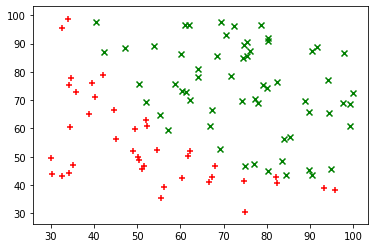

In [1425]:
plot_data(X, y)

In [1415]:
X_new, mean, std = normalize(X)

In [1416]:
X_new = prepare_X(X_new)
y_new = y.values.reshape((X.shape[0], 1))

In [1417]:
theta = np.array([0, 0, 0])

In [1418]:
cost_function(X_new, y_new, theta)

0.6931471805599453

In [1419]:
new_theta, Js = gradient_descent(X_new, y, theta, 0.01, 1e-7, 1000, False)
print(new_theta, len(Js))

[0.46660748 1.28609914 1.1531973 ] 1001


In [1420]:
cost_function(X_new, y_new, new_theta)

0.9604684441435373

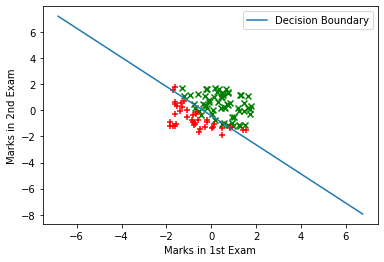

In [1424]:
plot_data((X-mean)/std, y)
X_plot = prepare_X((X-mean)/std)
decision_boundary(X_plot, y, mean, std, new_theta, ax=None, threshold=0.5, contourf=False)
#plt.plot(h(X_new, new_theta))
#plt.show()

In [1422]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))
print(h(X_new, new_theta));

[1. 1.]
[0.29916665 0.0371148  0.25194356 0.79447815 0.8718743  0.18136951
 0.88558055 0.46656786 0.92223645 0.57455266 0.67402142 0.24517352
 0.90066598 0.93505733 0.34303592 0.75426128 0.46416518 0.35571426
 0.92096073 0.5146568  0.29518845 0.88378974 0.16662211 0.04847804
 0.80983325 0.61663195 0.52497321 0.64119681 0.31512113 0.20025266
 0.64414811 0.76916506 0.34975691 0.44202249 0.28786337 0.24409585
 0.59760432 0.78262063 0.38732372 0.25859103 0.74233728 0.1588388
 0.91129635 0.49578002 0.14627998 0.34562228 0.81650038 0.97941942
 0.89342566 0.97273587 0.87041266 0.9141315  0.66723142 0.12435828
 0.17260246 0.27037865 0.93966184 0.52599031 0.77883426 0.83648402
 0.91081263 0.06113887 0.13857743 0.05130108 0.28788956 0.26263809
 0.67810845 0.17967767 0.95438581 0.55351347 0.04183123 0.74902234
 0.94112501 0.63421234 0.64906947 0.95719972 0.65312145 0.51446392
 0.20620668 0.52601377 0.90263917 0.75436965 0.64568222 0.37631364
 0.95142624 0.86476812 0.42364031 0.93204252 0.9613348 